# Optimisation convexe avec contraintes

### Importation des packages utiles :

In [1]:
import numpy as np
import cvxpy as cp
import pylab as py

### Optimisation convexe dans le cas où nous devons obligatoirement passer par tous les points :

(0.6751152977109317,
 7.822578748070432,
 -0.16561151576295255,
 3.158839899233474)

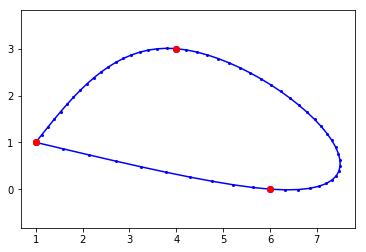

In [2]:
k = 4            # nombre de points de passage
T = np.zeros(k, int)   # vecteur des temps de passage
xw = np.zeros(k)  # vecteur des coordonnées des points de passage obligatoires

# On définit les différents temps de passage
T[0] = 1
T[1] = 20
T[2] = 50
T[3] = 60

# On définit les coordonnées des points de passage obligatoires
xw = np.array([[1, 4, 6, 1], [1, 3, 0, 1]])

# On crée les variables u (le coût du déplacement),
# x (la position de l'aéroglisseur), et v (la vitesse).
u = cp.Variable(shape=(2, T[k-1]))
x = cp.Variable(shape=(2, T[k-1]))
v = cp.Variable(shape=(2, T[k-1]))


# On définit les contraintes :

contraintes = []

for i in range(0, T[k-1]-1):
    contraintes += [
        x[:, i + 1] == x[:, i] + v[:, i],
        v[:, i + 1] == v[:, i] + u[:, i]
    ]

# xti=wi car nous sommes dans le cas où nous devons passer exatement
# sur les points
for i in range(0, k):
    contraintes += [xw[:, i] == x[:, T[i] - 1]]

# On minimise la somme des u^2 :

objective = cp.Minimize(cp.sum(u**2))
prob = cp.Problem(objective, contraintes)
prob.solve()

# On trace le trajet passant par tous les points et minimisant
# le coût du déplacement :

py.plot(x.value[0, :], x.value[1, :], "b.-", markersize=4)
py.plot(x.value[0, :][T[0:k-1]-1], x.value[1, :][T[0:k-1]-1], "b.",
        markersize=12)
py.plot(xw[0, :], xw[1, :], "r.", markersize=12)
py.axis("equal")


### Optimisation convexe dans le cas où nous sommes autorisés à manquer certains points :

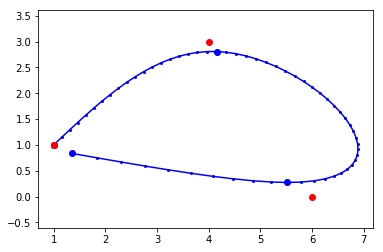

In [3]:
k = 4            # nombre de points de passage
T = np.zeros(k, int)   # vecteur des temps de passage
xw = np.zeros(k)    # vecteur des coordonnées des points de passage souhaités

# On définit les différents temps de passage
T[0] = 1
T[1] = 20
T[2] = 50
T[3] = 60

# On définit les coordonnées des points de passage souhaités
xw = np.array([[1, 4, 6, 1], [1, 3, 0, 1]])

# On crée les variables u (le coût du déplacement),
# x (la position de l'aéroglisseur), et v (la vitesse).
u = cp.Variable(shape=(2, T[k-1]))
x = cp.Variable(shape=(2, T[k-1]))
v = cp.Variable(shape=(2, T[k-1]))


# On crée une fonction de paramètre lambda :
def optimisation_convexe(Lambda):

    # On définit les contraintes :

    contraintes = []

    for i in range(0, T[k-1]-1):
        contraintes += [
            x[:, i+1] == x[:, i] + v[:, i],
            v[:, i+1] == v[:, i] + u[:, i]
        ]

    # On passe exactement sur le premier point de passage uniquement
    # (on s'autorise un écart sur les autres) :
    contraintes += [xw[:, 0] == x[:, T[0]-1]]

    # On minimise la somme des u^2 + Lambda * (somme des xti - wi)^2 :

    objective = cp.Minimize(cp.sum_squares(u) +
                            Lambda*cp.sum_squares((x[:, T[0:k]-1] -
                                                   xw[:, 0:k])))
    prob = cp.Problem(objective, contraintes)
    prob.solve()

    # On trace le trajet minimisant le coût du déplacement en s'autorisant
    # quelques écarts aux points de passages :

    py.plot(x.value[0, :], x.value[1, :], "b.-", markersize=4)
    py.plot(x.value[0, :][T[0:k]-1],
            x.value[1, :][T[0:k]-1], "b.", markersize=12)
    py.plot(xw[0, :], xw[1, :], "r.", markersize=12)
    py.axis("equal")

# On appelle la fonction optimisation_convexe et on choisit la
# valeur de lambda (ici 0.01) :
optimisation_convexe(0.01)
